<a href="https://colab.research.google.com/github/magladko/NAI/blob/master/mpp2/mpp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from google.colab import drive

In [ ]:
PATH = "/content/drive/MyDrive/4. semestr/NAI/mpp2"

In [ ]:
def normalize(vector):
  norm = 0
  for i in range(len(vector)):
    norm += vector[i] ** 2
  norm = norm ** 0.5
  for i in range(len(vector)):
    vector[i] = vector[i] / norm
  return vector

#Data loading and tweaking parameters

In [ ]:
#@title Tested species { run: "auto" }
first_species = "setosa" #@param ["virginica", "setosa", "versicolor"]
second_species = "virginica" #@param ["setosa", "versicolor", "virginica"]

species_id = {first_species: 0, second_species: 1}

train_df = pd.read_csv(f"{PATH}/iristrain.csv")
test_df = pd.read_csv(f"{PATH}/iristest.csv")

train_df = train_df[train_df['Species'].isin([first_species, second_species])]
test_df = test_df[test_df['Species'].isin([first_species, second_species])]

In [ ]:
#@title Enter learning parameters
starting_theta = 1.3 #@param {type:"slider", min:0, max:5, step:0.05}
alpha = 0.44 #@param {type:"slider", min:0, max:1, step:0.01}
beta = 0.45 #@param {type:"slider", min:0, max:1, step:0.01}
epochs = 139 #@param {type:"slider", min:1, max:500, step:1}

theta = starting_theta

Text(0.5, 1.05, 'Training dataset plot')

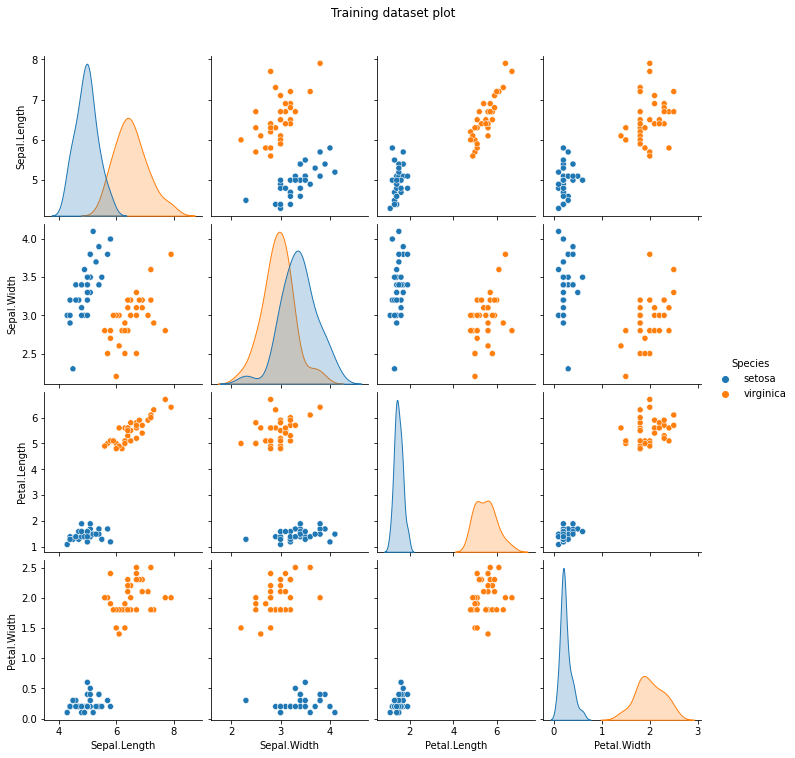

In [ ]:
plot = sns.pairplot(data=train_df.drop('nr', axis=1), hue='Species')
plot.fig.suptitle('Training dataset plot', y=1.05)

#Preceptron training

In [ ]:
weights = np.ones(len(train_df.iloc[:, 1:-1].columns))

train_res_df = train_df.copy()
train_res_df['dot_result'] = np.NaN
train_res_df['desicion'] = ''

for i in range(epochs):
  for index, row in train_df.drop(labels=['nr', 'Species'], axis=1).iterrows():
    train_res_df.loc[index, 'dot_result'] = np.dot(weights, row)

    if train_res_df.loc[index, 'dot_result'] >= theta:
      train_res_df.loc[index, 'desicion'] = first_species
    else:
      train_res_df.loc[index, 'desicion'] = second_species

    result_diff = species_id.get(train_res_df.loc[index, 'desicion']) - species_id.get(train_res_df.loc[index, 'Species'])
    weights += result_diff * alpha * row
    # weights /= np.linalg.norm(weights, ord=2) normalizacja progu

    theta -= result_diff * beta

weights = weights.tolist()
print(weights)

train_res_df

[-0.5732301839765525, -0.18050619247616098, -0.7405961569910524, -0.30056946436065574]


,nr,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,dot_result,desicion
0,1,5.1,3.5,1.4,0.2,setosa,-4.652194,virginica
1,2,4.9,3.0,1.4,0.2,setosa,5.557229,setosa
2,3,4.7,3.2,1.3,0.2,setosa,5.534261,setosa
3,6,5.4,3.9,1.7,0.4,setosa,6.470051,setosa
4,7,4.6,3.4,1.4,0.3,setosa,5.567058,setosa
...,...,...,...,...,...,...,...,...
95,144,6.8,3.2,5.9,2.3,virginica,-9.536412,virginica
96,145,6.7,3.3,5.7,2.5,virginica,-9.409134,virginica
97,146,6.7,3.0,5.2,2.3,virginica,-8.924571,virginica
98,147,6.3,2.5,5.0,1.9,virginica,-8.336678,virginica


##Error for training data

In [ ]:
training_errors = []

for index, row in train_res_df.iterrows():
  if row['Species'] != row['desicion']:
    training_errors.append(row)

traning_error_rate = len(training_errors) / len(train_res_df)
print(f"Training error rate: {round(traning_error_rate*100,2)}%")
print("Perceptron's properties:")

print(f"\tweights: {np.round(weights,5)}\n\ttheta: {np.round(theta,5)}")
print(f"\talpha: {np.round(alpha,5)}\n\tbeta:  {np.round(beta,5)}")

Training error rate: 2.99%
Perceptron's properties:
	weights: [-0.57323 -0.18051 -0.7406  -0.30057]
	theta: 1.75
	alpha: 0.44
	beta:  0.45


#Classification of the test dataset

In [ ]:
classified_test_df = test_df.copy()
classified_test_df['dot_result'] = np.NaN
classified_test_df['decision'] = ''


for index, row in test_df.drop(labels=['nr', 'Species'], axis=1).iterrows():
  classified_test_df.loc[index, 'dot_result'] = np.dot(weights, row)

  if classified_test_df.loc[index, 'dot_result'] >= theta:
    classified_test_df.loc[index, 'decision'] = first_species
  else:
    classified_test_df.loc[index, 'decision'] = second_species

classified_test_df.head()

,nr,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,dot_result,decision
0,4,4.6,3.1,1.5,0.2,setosa,-4.367436,virginica
1,5,5.0,3.6,1.4,0.2,setosa,-4.612922,virginica
2,10,4.9,3.1,1.5,0.1,setosa,-4.509348,virginica
3,11,5.4,3.7,1.5,0.2,setosa,-4.934324,virginica
4,16,5.7,4.4,1.5,0.4,setosa,-5.292761,virginica


##Error of the test dataset

In [ ]:
test_errors = []

for index, row in classified_test_df.iterrows():
  if row['Species'] != row['decision']:
    test_errors.append(row)

test_errors = len(test_errors) / len(classified_test_df)
print(f"Training error rate: {round(test_errors*100,2)}%")
print("Perceptron's properties:")

print(f"\tweights: {np.round(weights,5)}\n\ttheta: {np.round(theta,5)}")
print(f"\talpha: {np.round(alpha,5)}\n\tbeta:  {np.round(beta,5)}")

Training error rate: 48.48%
Perceptron's properties:
	weights: [-0.57323 -0.18051 -0.7406  -0.30057]
	theta: 1.75
	alpha: 0.44
	beta:  0.45


In [ ]:
#@title Custom input
parameters = "1,2,3,4" #@param {type:"string"}

parameters = np.array(re.split(r',+', parameters), dtype=float)
print(parameters)
result = ''

if np.dot(weights, parameters) >= theta:
  result = first_species
else:
  result = second_species

print(result)

[1. 2. 3. 4.]
virginica
